Decision-tree classifier outputs E_new dependent on the maximum depth allowed

KFold(n_splits=10, random_state=2, shuffle=True)


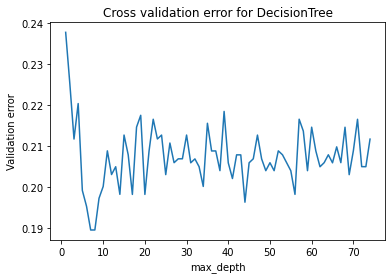

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import sklearn.preprocessing as skl_pre
import sklearn.model_selection as skl_ms

np.random.seed(1)

dir = '/home/toidface/Documents/ML_proj/Tree based/DecisionTree/'
Train = pd.read_csv("/content/train.csv") 

Y_train = Train['Lead']
X_train = Train.drop(columns=['Lead'])
# 1. Use scaler on the data set (just parameters)
scaler = skl_pre.StandardScaler().fit(X_train)
# 2. Scale the training data
X_train_norm = scaler.transform(X_train)
# k-fold runs
n_fold = 10
cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
K = np.arange(1, 75)
misclassification = np.zeros(len(K))
print(cv)
# then run for different depths
for train_index, val_index in cv.split(X_train):
    x_train, x_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Normalise
    X_train_norm = scaler.transform(x_train)
    X_val_norm = scaler.transform(x_val)
    for j, k in enumerate(K):
        model = tree.DecisionTreeClassifier(max_depth=k)
        model.fit(X_train_norm, y_train)
        prediction = model.predict(X_val_norm)
        misclassification[j] += np.mean(prediction != y_val) 
# Save Acc. rate & crosstab to File
misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for DecisionTree')
plt.xlabel('max_depth')
plt.ylabel('Validation error')
plt.show()


Decision-tree classifier E_new dependent on the maximum number of leaf-nodes allowed

KFold(n_splits=10, random_state=2, shuffle=True)


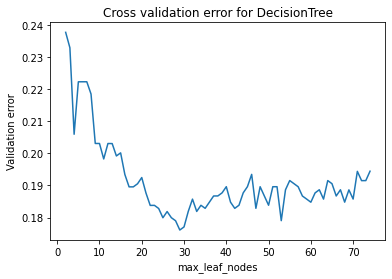

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import sklearn.preprocessing as skl_pre
import sklearn.model_selection as skl_ms

np.random.seed(1)

Train = pd.read_csv("/content/train.csv")

Y_train = Train['Lead']
X_train = Train.drop(columns=['Lead'])
# 1. Use scaler on the data set (just parameters)
scaler = skl_pre.StandardScaler().fit(X_train)
# 2. Scale the training data
X_train_norm = scaler.transform(X_train)
 
# k-fold runs
n_fold = 10
cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
K = np.arange(2, 75)
misclassification = np.zeros(len(K))
print(cv)
# then run for different depths
for train_index, val_index in cv.split(X_train):
    x_train, x_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Normalise
    X_train_norm = scaler.transform(x_train)
    X_val_norm = scaler.transform(x_val)
    for j, k in enumerate(K):
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(X_train_norm, y_train)
        prediction = model.predict(X_val_norm)
        misclassification[j] += np.mean(prediction != y_val)
# Save Acc. rate & crosstab to File
misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for DecisionTree')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Validation error')
plt.show()


Random forest classifier and cross-validation error-check

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.model_selection as skl_ms
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

Train = pd.read_csv("/content/train.csv")

Y_train = Train['Lead']
X_train = Train.drop(columns=['Lead'])
# 1. Use scaler on the data set (just parameters)
scaler = skl_pre.StandardScaler().fit(X_train)
# 2. Scale the training data
X_train_norm = scaler.transform(X_train)

# k-fold runs
n_fold = 10
cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
K = np.arange(1, 75)
misclassification = np.zeros(len(K)) 
# then run for different depths
for train_index, val_index in cv.split(X_train):
    x_train, x_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Normalise
    X_train_norm = scaler.transform(x_train)
    X_val_norm = scaler.transform(x_val)
    for j, k in enumerate(K):
        model = RandomForestClassifier(n_estimators=k)
        model.fit(X_train_norm, y_train)
        prediction = model.predict(X_val_norm)
        misclassification[j] += np.mean(prediction != y_val)

# Save Acc. rate & crosstab to File
misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for DecisionTree')
plt.xlabel('No estimators')
plt.ylabel('Validation error')
plt.show()


Train all methods and check the E_new after bagging, depending on the number of estimators

(1039, 14)
KFold(n_splits=10, random_state=2, shuffle=True)
0
0
1
1
2
2


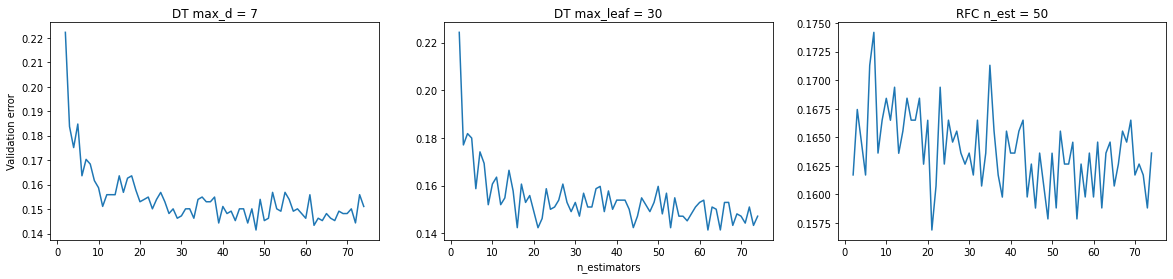

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import sklearn.preprocessing as skl_pre
import sklearn.model_selection as skl_ms
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

np.random.seed(1)
# Create array of classifiers to test bagging
classifierName = [tree.DecisionTreeClassifier(max_depth=7),
                  tree.DecisionTreeClassifier(max_leaf_nodes=30),
                  RandomForestClassifier(n_estimators=50)]

Train = pd.read_csv("/content/train.csv") 

Y_train = Train['Lead']
X_train = Train.drop(columns=['Lead'])
# 1. Use scaler on the data set (just parameters)
scaler = skl_pre.StandardScaler().fit(X_train)
# 2. Scale the training data
X_train_norm = scaler.transform(X_train)

# n-fold runs
n_fold = 10
cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
K = np.arange(2, 75)
misclassification = np.zeros((len(classifierName), len(K))) 
# run all models and save for subplot
for m in np.arange(len(classifierName)):
    print(m)
    # run for all splits
    for train_index, val_index in cv.split(X_train):
        x_train, x_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[val_index]

        # Normalise
        X_train_norm = scaler.transform(x_train)
        X_val_norm = scaler.transform(x_val)
        # Train model on split
        for j, k in enumerate(K):
            model = BaggingClassifier(
                base_estimator=classifierName[m],
                n_estimators=k)
            model.fit(X_train_norm, y_train)
            prediction = model.predict(X_val_norm)
            misclassification[m, j] += np.mean(prediction != y_val)
            # if the tree-structure is of interest
            # dot_data = tree.export_graphviz(model,
            #                                 out_file=dir + "None_" + str(i),
            #                                feature_names=X_train.columns,
            #                                class_names=model.classes_,
            #                                filled=True,
            #                                rounded=True,
            #                                leaves_parallel=True,
            #                                proportion=True)

            # graph = graphviz.Source(dot_data)
    print(m)

# Plot cross-val-error per method, assuming three models, change if necessary
misclassification /= n_fold
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(K, misclassification[0, :])
ax1.set_title('DT max_d = 7')
ax1.set(xlabel='', ylabel='Validation error')
ax2.plot(K, misclassification[1, :])
ax2.set_title('DT max_leaf = 30')
ax2.set(xlabel='n_estimators', ylabel='')
ax3.plot(K, misclassification[2, :])
ax3.set_title('RFC n_est = 50')
ax3.set(xlabel='', ylabel='')
fig.set_figwidth(20)
plt.show()
